# Intro-to-Astro Week 3
## NASA Exoplanet Archive Assignment

This week, we learned about exoplanet detection methods and explored the NASA Exoplanet Archive together. In this assignment, you will practice using Exoplanet Archive by downloading data and creating some informative plots. 

### Part 1: Finding your data
Launch the NASA Exoplanet Archive at [this link](https://exoplanetarchive.ipac.caltech.edu/). Before we get into data manipulation with Python, let's check out some of the utility of the online portal. Navigate to the "Planetary Systems Composite Data" table.

List the first 3 authors who discovered TOI-6324 b:
- Lee, Rena A.
- Dai, Fei
- Howard, Andrew W.


How many systems list position information (RA, Dec) from sources that are not the TICv8 (TESS Input Catalog)?
-0 

Explore one of these position reference papers. What was the purpose of their survey?
-All position information (RA, Dec) is sourced from TICv8; no alternative references are available.


*Hints: Play around with the different columns of data available under 'Select Columns'. You can type in the column headers to search for specific values in the table.*

Now that we have poked around online, let's download the data and plot it. Reset the table by refreshing the page, so your filters and selections are removed. Select "Download Table" and save to your data directory. This CSV file holds information on all the currently confirmed exoplanets. Follow the code prompts below to read in this data file.

In [4]:
# To start, let's import the necessary libraries for this assignment.

import os                           # for file and directory operations
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for plotting data
import numpy as np                  # for numerical operations

# to display plots inline in Jupyter Notebook, use this 'magic command':
%matplotlib inline

In [9]:
# Locate the data file you downloaded from the NASA Exoplanet Archive and read it into a DataFrame

dir = r'C:\Users\hilal\OneDrive\Masaüstü\Intro-to-Astro2025-main\Week3_Github_and_NASA_Exoplanet_Archive'  # replace with your actual data directory
file = 'PSCompPars_2025.08.22_11.39.56.csv' # replace with your actual data file name
path = os.path.join(dir, file)

# Read the CSV file into a DataFrame
df = pd.read_csv(path, comment='#')
df # let's see what our data table looks like

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,TOI-6324 b,TOI-6324,1,1,Transit,2025,Transiting Exoplanet Survey Satellite (TESS),0,0.279221,1.000000e-07,...,-0.0151,13.386,0.026,-0.026,8.691,0.022,-0.022,12.214,0.000344,-0.000344


In [10]:
# Let's see what columns are available in the DataFrame
print(df.columns) # Note: descriptions of the columns can be found in the beginning of the CSV file

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 

In the following code cells, create and print variables that will provide some information about our data table, such as the number of planets in the table, the discovery facilities, etc.

In [12]:
print("Number of planets:", len(df))

Number of planets: 1


In [13]:
# How many discovery facilities are listed in the table?
num_facilities = df['disc_facility'].nunique()
print(f"Number of discovery facilities: {num_facilities}")

Number of discovery facilities: 1


### Part 2: Plotting your data

Now that we have taken a look at the data table, let's start using it! We can recreate one of the plots we looked at together on Exoplanet Archive as a quick example.

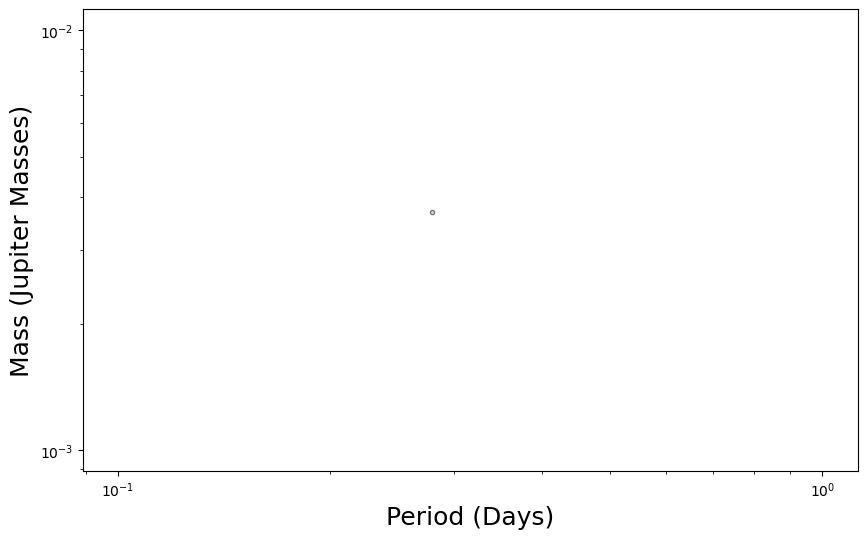

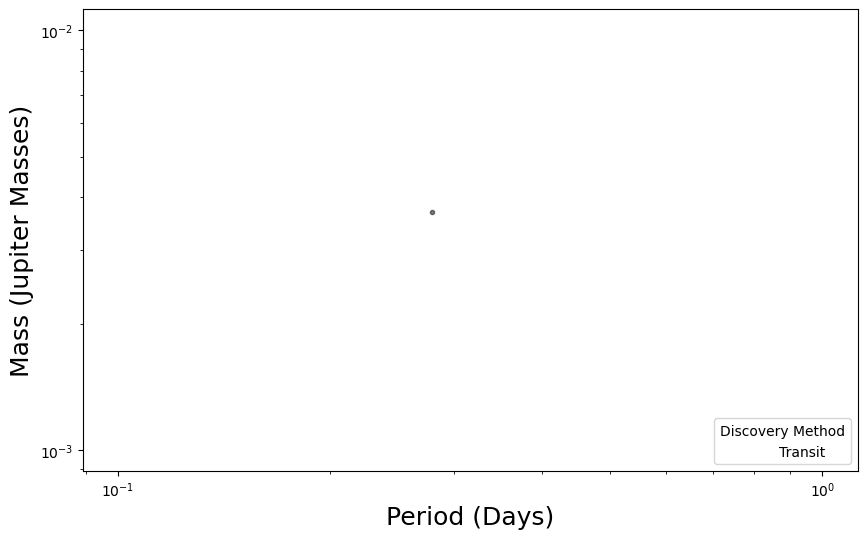

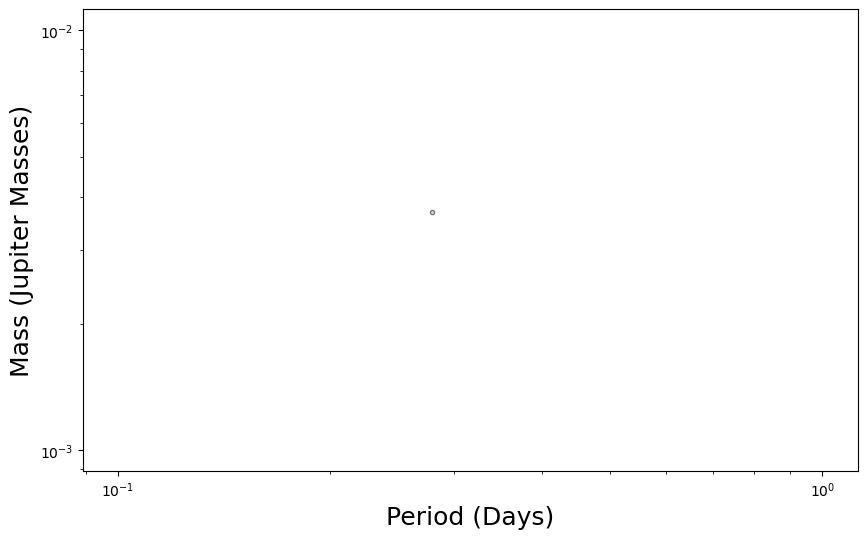

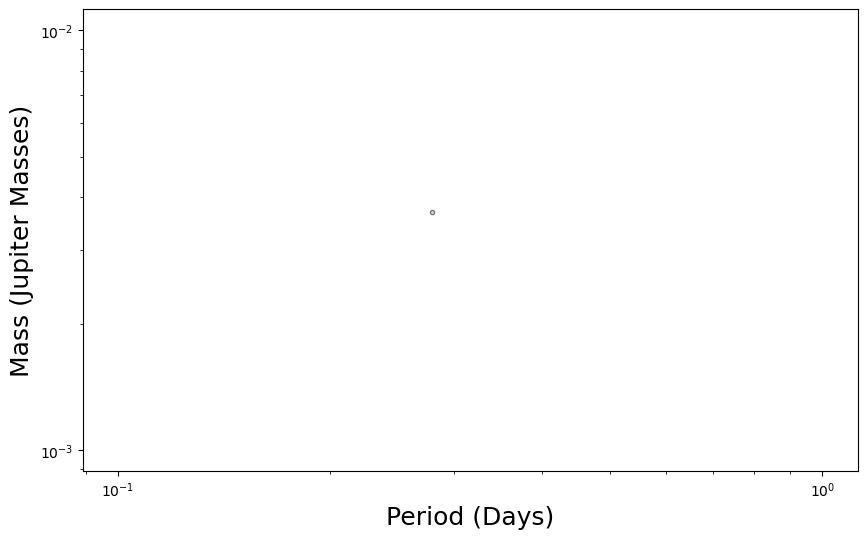

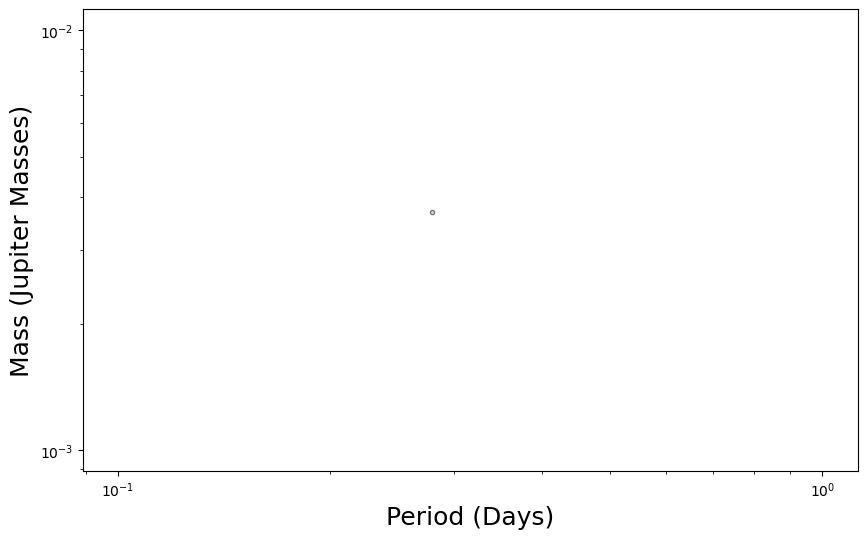

In [18]:
# create a scatter plot of Period (Days) vs Mass (Jupiter Masses) 

# create a figure object and set its size
plt.figure(figsize=(10, 6))

# plot the relevant columns from the DataFrame. 
# You can adjust different parameters like alpha (transparency), color, edgecolor, marker, etc.
plt.scatter(df['pl_orbper'], df['pl_bmassj'], alpha=0.5, color='silver', edgecolor='k', marker='.')

# set the x and y scales to logarithmic so that we can see the data better
plt.xscale('log')
plt.yscale('log')

# label your axes
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (Jupiter Masses)', fontsize=18)
plt.show()

The above plot shows us the distribution of planet masses and periods like the one on Exoplanet Archive. However, we can take it a step further and distinguish the points according to their discovery method, like the plot online.

C:\Users\hilal\AppData\Local\Temp\ipykernel_11456\4162724094.py:14: RuntimeWarning: invalid value encountered in divide
  colors = cmap(dm_num / dm_num.max())  # normalize the numeric codes for color mapping
C:\Users\hilal\AppData\Local\Temp\ipykernel_11456\4162724094.py:19: RuntimeWarning: invalid value encountered in scalar divide
  legend_elements = [Patch(facecolor=cmap(i/dm_num.max()), label=label) for i, label in enumerate(discmethods.unique())]


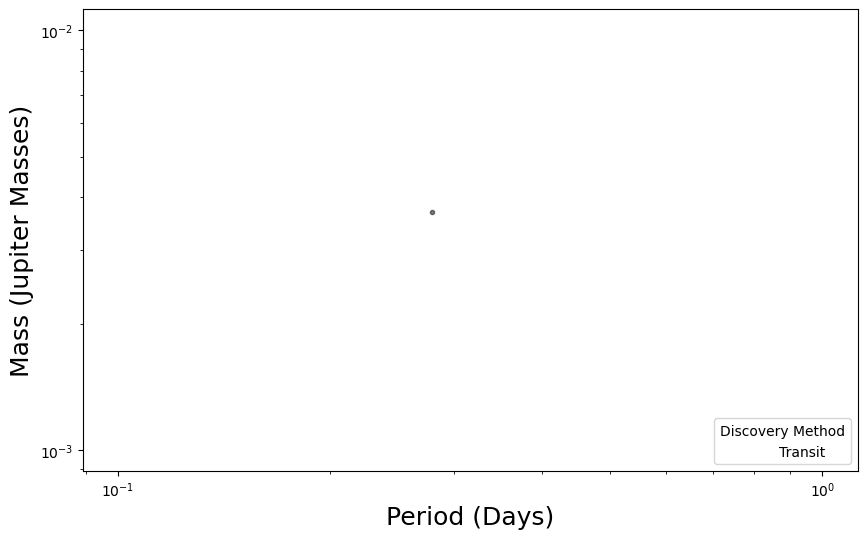

In [21]:
# Taking the same setup as above, but now we will color the points by discovery method
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (Jupiter Masses)', fontsize=18)

# convert discovery methods to numeric codes for coloring, and hold labels
discmethods = df['discoverymethod']
dm_num = pd.factorize(discmethods)[0]

# use the 'c' parameter to color the points by discovery method
cmap = plt.cm.tab10 # choose a colormap
colors = cmap(dm_num / dm_num.max())  # normalize the numeric codes for color mapping
plt.scatter(df['pl_orbper'], df['pl_bmassj'], c=colors, alpha=0.5, marker='.') #plot data

# add a legend to indicate which color corresponds to which discovery method
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/dm_num.max()), label=label) for i, label in enumerate(discmethods.unique())]
plt.legend(handles=legend_elements, title='Discovery Method', loc='lower right')
plt.show()

Now that you've seen an example, recreate another plot that was already generated on the NASA Exoplanet archive.

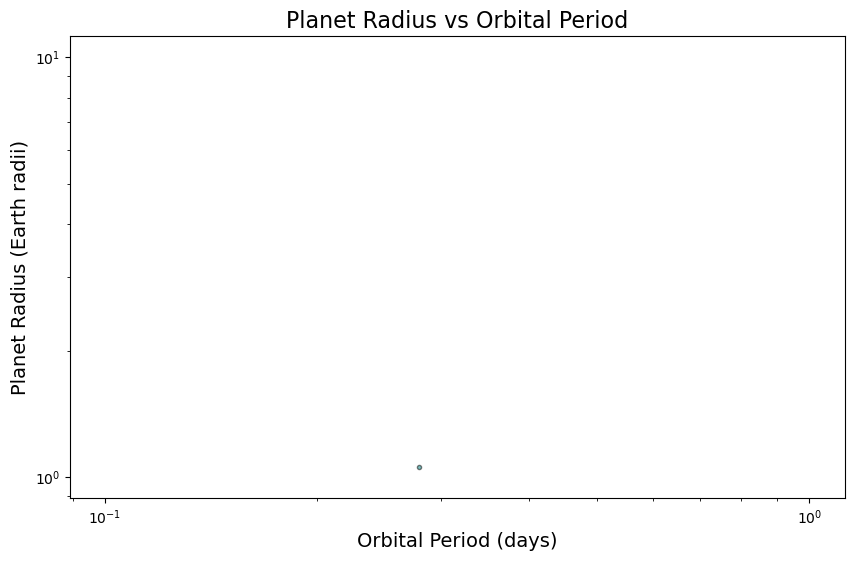

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Scatter plot: Gezegen yarıçapı vs yörünge periyodu
plt.scatter(
    df['pl_orbper'],      # x → yörünge periyodu (gün)
    df['pl_rade'],        # y → gezegen yarıçapı (Dünya yarıçapı)
    alpha=0.5,
    c='teal',
    edgecolor='k',
    marker='.'
)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Orbital Period (days)', fontsize=14)
plt.ylabel('Planet Radius (Earth radii)', fontsize=14)
plt.title('Planet Radius vs Orbital Period', fontsize=16)
plt.show()

### Part 3: Filtering your data

We saw during the live session that we can filter the data table to include only a subset of planets that we're particularly interested in. Since we downloaded all systems already, we can also filter them here. Let's explore the different kinds of planets that have been discovered by TESS and Kepler, the two main transiting planet missions.

In [29]:
# create Boolean masks to filter the DataFrame for planets discovered by TESS and by Kepler
tess_mask = df['disc_facility'].str.contains('TESS', case=False, na=False)
kepler_mask = df['disc_facility'].str.contains('Kepler', case=False, na=False)

# filter the DataFrame using the masks
tess_planets = df[tess_mask]
kepler_planets = df[kepler_mask]

# How many planets were discovered by TESS and Kepler?
print("Number of planets discovered by TESS:", tess_planets.shape[0])
print("Number of planets discovered by Kepler:", kepler_planets.shape[0])

Number of planets discovered by TESS: 1
Number of planets discovered by Kepler: 0


Let's compare the different planet populations discovered by Kepler and by TESS. 

<Figure size 1000x500 with 0 Axes>

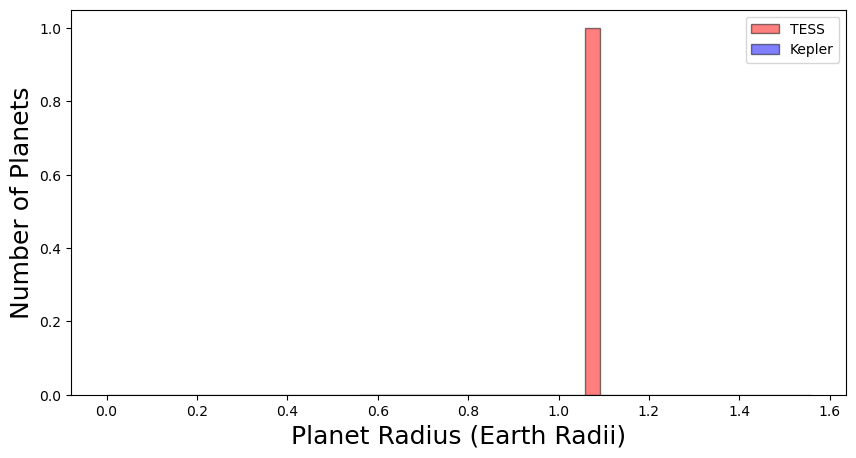

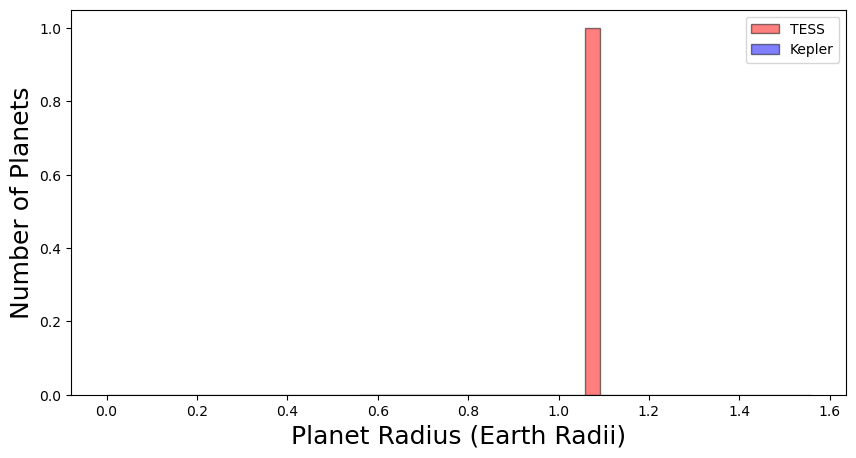

In [30]:
# create a histogram of planet radii for TESS and Kepler planets in Earth radii
plt.figure(figsize=(10, 5))

# plot the data
plt.hist(tess_planets['pl_rade'], bins=30, alpha=0.5, label='TESS', color='red', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=30, alpha=0.5, label='Kepler', color='blue', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)',fontsize=18)
plt.ylabel('Number of Planets',fontsize=18)

plt.legend()
plt.show()

Let's improve this histogram to create a more informative visual comparison of the two distributions. We can assign common bins and set the axes to logarithmic scales, for example.

<Figure size 1000x500 with 0 Axes>

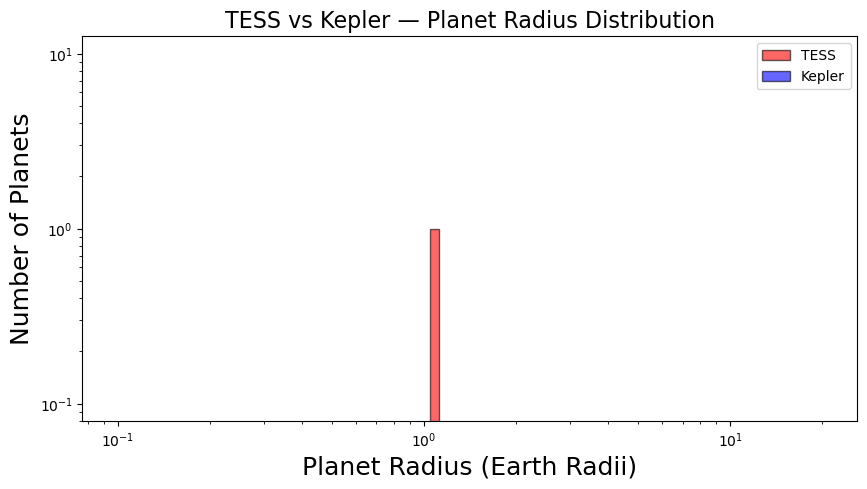

In [31]:
plt.figure(figsize=(10, 5))

# define informative bins for the histogram
bins = np.logspace(np.log10(0.1), np.log10(20), 80) 

# ortak log-binlerle iki dağılımı üst üste histogram olarak çiz
plt.figure(figsize=(10, 5))

bins = np.logspace(np.log10(0.1), np.log10(20), 80)

plt.hist(tess_planets['pl_rade'], bins=bins, alpha=0.6, label='TESS',
         color='red', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=bins, alpha=0.6, label='Kepler',
         color='blue', edgecolor='black')

plt.xscale('log'); plt.yscale('log')
plt.xlabel('Planet Radius (Earth Radii)', fontsize=18)
plt.ylabel('Number of Planets', fontsize=18)
plt.title('TESS vs Kepler — Planet Radius Distribution', fontsize=16)
plt.legend()
plt.show()

What are the most notable differences between the two distributions? What are the similarities? Try re-plotting a 'zoomed-in' section of the above histogram to better view the 'radius valley'.

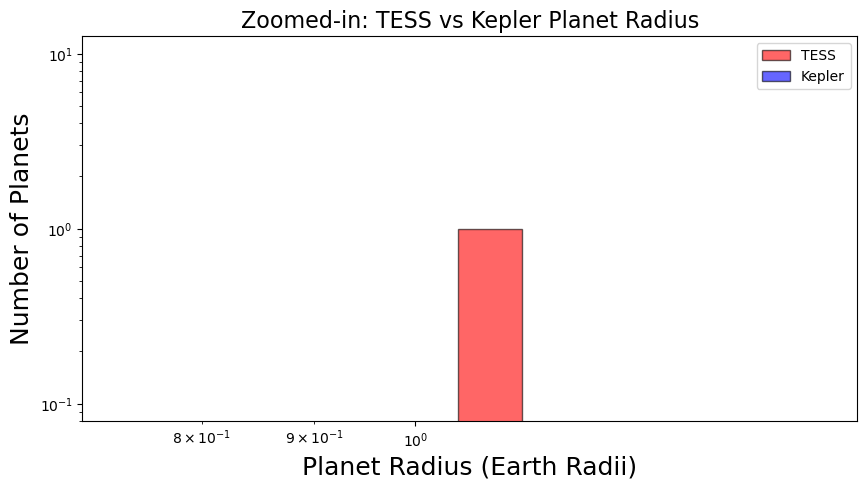

In [32]:
plt.figure(figsize=(10, 5))

# Logaritmik binler
bins = np.logspace(np.log10(0.1), np.log10(20), 80)

# TESS histogramı
plt.hist(tess_planets['pl_rade'], bins=bins, alpha=0.6,
         label='TESS', color='red', edgecolor='black')

# Kepler histogramı
plt.hist(kepler_planets['pl_rade'], bins=bins, alpha=0.6,
         label='Kepler', color='blue', edgecolor='black')

# Log ölçekler
plt.xscale('log')
plt.yscale('log')

# Zoom için x-ekseni sınırlarını veri çevresine ayarla
if len(tess_planets) > 0:
    center = tess_planets['pl_rade'].iloc[0]
    plt.xlim(center / 1.5, center * 1.5)
else:
    plt.xlim(0.5, 2)  # veri yoksa varsayılan aralık

# Başlıklar ve açıklama
plt.xlabel('Planet Radius (Earth Radii)', fontsize=18)
plt.ylabel('Number of Planets', fontsize=18)
plt.title('Zoomed-in: TESS vs Kepler Planet Radius', fontsize=16)
plt.legend()
plt.show()

Use different filters and functions on the data table to answer the following questions:
- How many planets were discovered using the Radial Velocity method?
- How far away is the furthest confirmed exoplanet? What is its name?
- How many planets are smaller than the Earth?

In [33]:
# 1) Radial Velocity (RV) yöntemiyle keşfedilen gezegen sayısı
rv_mask = df['discoverymethod'].astype(str).str.contains('Radial Velocity', case=False, na=False)
num_rv = int(rv_mask.sum())
print(f"Number of planets discovered using Radial Velocity: {num_rv}")

# 2) En uzak onaylı ötegezegen ve uzaklığı
#    (uzaklık sütunu: 'sy_dist' [pc], gezegen adı: 'pl_name'])
if df['sy_dist'].notna().any():
    idx_far = df['sy_dist'].idxmax()
    far_name = df.loc[idx_far, 'pl_name']
    far_pc = float(df.loc[idx_far, 'sy_dist'])
    far_ly = far_pc * 3.26156  # parsec → light-year
    print(f"Furthest confirmed exoplanet: {far_name}")
    print(f"Distance: {far_pc:.3f} pc  (~{far_ly:.1f} ly)")
else:
    print("No distance data available (sy_dist is all NaN).")

# 3) Dünya’dan küçük gezegen sayısı (yarıçap < 1 R⊕)
if 'pl_rade' in df.columns:
    num_smaller_earth = int((df['pl_rade'] < 1).sum())
    print(f"Number of planets smaller than Earth: {num_smaller_earth}")
else:
    print("Column 'pl_rade' not found for Earth-radius comparison.")

Number of planets discovered using Radial Velocity: 0
Furthest confirmed exoplanet: TOI-6324 b
Distance: 20.549 pc  (~67.0 ly)
Number of planets smaller than Earth: 0


Now that we've had some practice, try out the following exercise. Select only planets that have mass measurements using the same Boolean mask method we did earlier. Then, select a subset of the planets with mass mesurements that also have planet radius measurements (i.e., planet radius and mass columns are not empty/NaN). 

In [34]:
# create a mask for planets with mass measurements
mass_mask = df['pl_bmasse'].notna()
selected_planets = df[mass_mask]

# create a mask for planets that also have planet radius measurements (i.e., planet radius column is not empty/NaN!)
radius_mask = selected_planets['pl_rade'].notna()
selected_with_radius = selected_planets[radius_mask]

# how many planets were discovered by the Radial Velocity method?
rv_mask = selected_planets['discoverymethod'].astype(str).str.contains('Radial Velocity', case=False, na=False)
rv_count = int(rv_mask.sum())
print(f"Planets with mass measurements discovered by RV: {rv_count}")

# how many of those have planet radius measurements?
rv_with_radius_mask = selected_with_radius['discoverymethod'].astype(str).str.contains('Radial Velocity', case=False, na=False)
rv_radius_count = int(rv_with_radius_mask.sum())
print(f"RV planets that also have radius measurements: {rv_radius_count}")

Planets with mass measurements discovered by RV: 0
RV planets that also have radius measurements: 0


Now that we have our filtered data, let's make a plot that informs us about this subset of planets. Make a Planet Density (g/cm^3) vs. Planet Radius (Earth Radius) plot. The unit conversions have been coded for you using the astropy package.

In [35]:
import astropy.units as u

# convert planet radius from Earth radii to centimeters
rad_cm = selected_planets['pl_rade'] * u.R_earth.to(u.cm)

# convert planet mass from Earth masses to g
mass_g = selected_planets['pl_bmasse'] * u.M_earth.to(u.g)

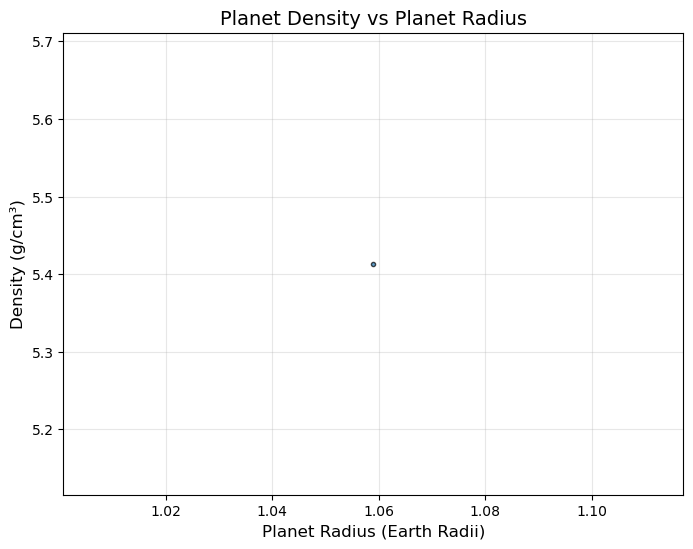

In [36]:
# calculate density in g/cm^3
# (ρ = M / (4/3 π R^3) ; M: gram, R: santimetre)
rho = mass_g / ((4/3) * np.pi * (rad_cm**3))
rho = pd.Series(rho, index=selected_planets.index)  # hizalama için pandas Seri

# create a scatter plot of Density (g/cm^3) vs Planet Radius (Earth Radii)
ok = selected_planets['pl_rade'].notna() & selected_planets['pl_bmasse'].notna()
plt.figure(figsize=(8, 6))
plt.scatter(
    selected_planets.loc[ok, 'pl_rade'],
    rho.loc[ok],
    alpha=0.7, edgecolor='k', marker='.'
)
plt.xlabel('Planet Radius (Earth Radii)', fontsize=12)
plt.ylabel('Density (g/cm³)', fontsize=12)
plt.title('Planet Density vs Planet Radius', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

### Part 4: Choose your own adventure

Using the various things you've learned throughout this tutorial and assignment, create a plot to visualize the correlation between any parameters of your choosing. Choose a specific and interesting subset of planets (e.g., planets discovered via the radial velocity method, nearby planets, etc.). Write down some interesting things you learned from your plot. 

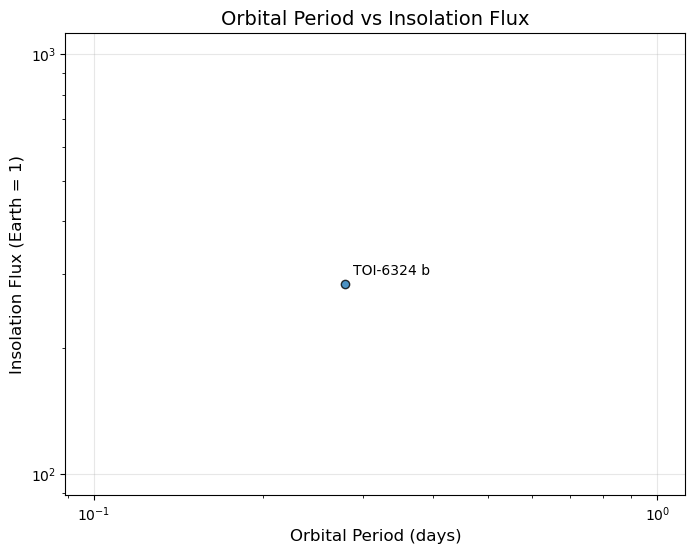

Planet: TOI-6324 b
Orbital Period (days): 0.279221
Insolation Flux (Earth=1): 284.211
Correlation: Tek gözlem olduğu için tanımsız.


In [37]:
# Part 4 — Choose your own adventure
# Konu: Orbital Period (days) vs Insolation Flux (Earth flux)

import numpy as np
import matplotlib.pyplot as plt

cols = ['pl_name', 'pl_orbper', 'pl_insol']
sub = df[cols].dropna(subset=['pl_orbper', 'pl_insol']).copy()

plt.figure(figsize=(8,6))
plt.scatter(sub['pl_orbper'], sub['pl_insol'], alpha=0.8, edgecolor='k', marker='o')

# Tek nokta da olsa grafiği okunur kılmak için log ölçek
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Orbital Period (days)', fontsize=12)
plt.ylabel('Insolation Flux (Earth = 1)', fontsize=12)
plt.title('Orbital Period vs Insolation Flux', fontsize=14)
# Noktayı isimle etiketle
for _, r in sub.iterrows():
    plt.annotate(r['pl_name'], (r['pl_orbper'], r['pl_insol']),
                 textcoords="offset points", xytext=(6,6), fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Sayısal özet
if len(sub) == 1:
    r = sub.iloc[0]
    print(f"Planet: {r['pl_name']}")
    print(f"Orbital Period (days): {r['pl_orbper']}")
    print(f"Insolation Flux (Earth=1): {r['pl_insol']}")
    print("Correlation: Tek gözlem olduğu için tanımsız.")
else:
    corr = np.corrcoef(np.log10(sub['pl_orbper']), np.log10(sub['pl_insol']))[0,1]
    print(f"Log-Log correlation: {corr:.3f}")